In [5]:
!pip install yfinance

In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


In [9]:
data = yf.download("SPY AAPL" , start='2020-01-01',end="2021-09-30")

[*********************100%***********************]  2 of 2 completed


In [10]:
df = data.Close.copy()

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

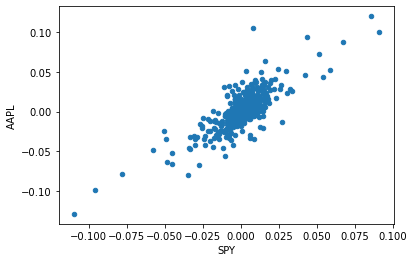

In [11]:
df.pct_change(1).plot.scatter(x="SPY",y="AAPL")

In [12]:
df_ret = df.pct_change()

In [13]:
df_ret

,AAPL,SPY
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
2020-01-08,0.016086,0.005330
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [14]:
x = df_ret.AAPL
y = df_ret.SPY

In [15]:
x.dropna(inplace=True)
y.dropna(inplace=True)

In [16]:
m,c = np.polyfit(x,y,1)

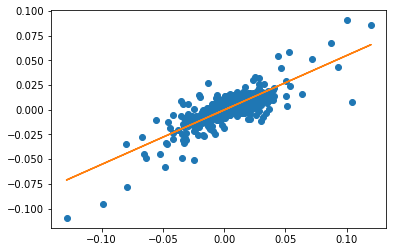

In [18]:
plt.plot(x,y,'o')
plt.plot(x,m*x+c)

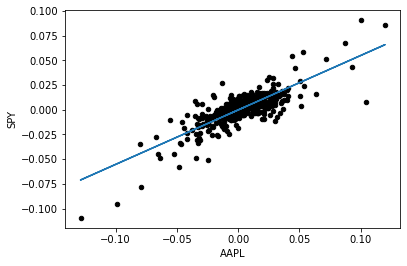

In [22]:
df_ret.plot.scatter(x='AAPL',y='SPY',c='k')
plt.plot(x, m*x+c)

In [24]:
df_ret[(df_ret.SPY < -0.075)]

,AAPL,SPY
Date,,
2020-03-09,-0.079092,-0.078094
2020-03-12,-0.098755,-0.095677
2020-03-16,-0.128647,-0.109424


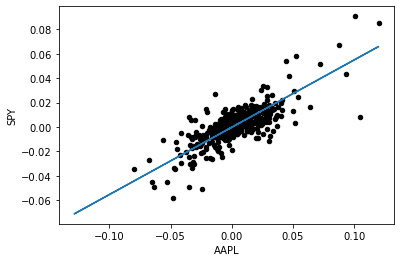

In [29]:
df_ret = df_ret[~(df_ret.SPY < -0.075)]
m,c = np.polyfit(x,y,1)
df_ret.plot.scatter(x='AAPL',y='SPY',c='k')
plt.plot(x,m*x+c)

In [30]:
df_ret.loc[(df_ret['AAPL'] > 0.1) & (df_ret['SPY']<0.02)]

,AAPL,SPY
Date,,
2020-07-31,0.104689,0.007902


In [31]:
df_ret.loc[df_ret.index != '2020-07-31']

,AAPL,SPY
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
2020-01-08,0.016086,0.005330
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [40]:
(df_ret['AAPL'] > 0.1) & (df_ret['SPY']<0.02)

Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2021-09-23    False
2021-09-24    False
2021-09-27    False
2021-09-28    False
2021-09-29    False
Length: 437, dtype: bool

In [32]:
test = df_ret.loc[~((df_ret['AAPL'] > 0.1) & (df_ret['SPY']<0.02))]

In [43]:
test

,AAPL,SPY
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
2020-01-08,0.016086,0.005330
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


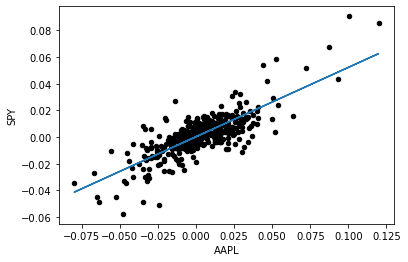

In [36]:
x = test.AAPL.dropna()
y = test.SPY.dropna()
m,c = np.polyfit(x,y,1)

test.plot.scatter(x='AAPL',y='SPY',c='k')
plt.plot(x,m*x+c)